In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import numpy as np
import graphviz


#Scale 변환: 평균, 표준편차, 기준

from sklearn.preprocessing import StandardScaler

#주성분 분석
from sklearn.decomposition import PCA

#회귀분석
from statsmodels.formula.api import ols
#qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
#선형 모델 formula(y~X1+X2+...)

import statsmodels.formula.api as smf
#평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier as GBC
import seaborn as sns
# 주피터 사용시 그래프자동출력 옵션
matplotlib.rc('font', family ='Malgun Gothic')

import statsmodels.formula.api as smf # 선형모델 formula(y ~ x1 +x2+ x3)
import statsmodels.api as sm
# ols Ordinary Least Squares (최소자승법 라이브러리)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


from statsmodels.api import Logit

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
# 한글 맑은 고딕 적용
matplotlib.rc('font',family='NanumGothic')

# matplotlib  패키지 한글 깨짐 처리
# 한글 폰트(맑은 고딕) 적용 : 윈도우, 구글 콜랩
matplotlib.rc('font',family='NanumGothic')
plt.rc('font',family='NanumGothic')

# seaborn에서 한글 깨짐 해결:unicode minus 사용 않기 위한 설정(minus 깨짐 현상 방지)
plt.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.api as smd
from statsmodels.stats.proportion import proportions_ztest

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 혈액검사 데이터프레임 생성  이상치 확인 및 결측치 제거

In [203]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/insu_result.csv', engine = 'python', encoding ='EUC-KR')
df

,Unnamed: 0,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk
0,0,C112379,혈액검사,재검,2014-12-09,1,69,160,59,84.0,72.0,80,135,66.0,231.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,29.0,17.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,1,C112404,혈액검사,재검,2015-03-29,1,69,175,79,101.0,92.0,80,120,70.0,264.0,NaN,74.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,25.0,20.0,156.0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,C112411,일반검진,재검,2015-09-20,1,69,165,70,92.0,88.0,75,120,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,C112570,일반검진,재검,2015-05-27,1,67,165,75,95.0,89.0,90,140,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4,C112856,혈액검사,재검,2015-08-04,1,62,165,70,96.0,82.0,80,130,64.0,142.0,1.2,84.0,17.4,NEGATIVE,50.5,31.0,34.0,90.0,181.0,561.0,8000.0,36.0,22.0,36.0,174.0,2,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,2078,C134184,혈액검사,승인,2015-08-13,2,53,155,62,94.0,82.0,85,120,64.0,194.0,0.8,85.0,13.4,NEGATIVE,39.8,29.6,33.7,87.9,325.0,453.0,5410.0,17.0,22.0,22.0,248.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2079,2079,C134188,일반검진,승인,2015-06-22,1,41,175,78,100.0,92.0,80,110,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2080,2080,C134197,혈액검사,재검,2014-12-23,1,42,178,70,95.0,86.0,75,115,76.0,152.0,NaN,92.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,15.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2081,2081,C134221,혈액검사,재검,2015-09-09,2,51,159,52,85.0,72.0,70,110,72.0,262.0,0.9,91.0,14.0,NEGATIVE,40.9,31.0,34.0,90.0,279.0,455.0,8600.0,18.0,21.0,19.0,149.0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [204]:
df['bmi'] = (df['weight']/(df['height']/100)**2).round(2)
df['whtr'] = (df['waist']/df['height']).round(2)
df

,Unnamed: 0,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk,bmi,whtr
0,0,C112379,혈액검사,재검,2014-12-09,1,69,160,59,84.0,72.0,80,135,66.0,231.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,29.0,17.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,23.05,0.45
1,1,C112404,혈액검사,재검,2015-03-29,1,69,175,79,101.0,92.0,80,120,70.0,264.0,NaN,74.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,25.0,20.0,156.0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,25.80,0.53
2,2,C112411,일반검진,재검,2015-09-20,1,69,165,70,92.0,88.0,75,120,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,25.71,0.53
3,3,C112570,일반검진,재검,2015-05-27,1,67,165,75,95.0,89.0,90,140,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,27.55,0.54
4,4,C112856,혈액검사,재검,2015-08-04,1,62,165,70,96.0,82.0,80,130,64.0,142.0,1.2,84.0,17.4,NEGATIVE,50.5,31.0,34.0,90.0,181.0,561.0,8000.0,36.0,22.0,36.0,174.0,2,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,25.71,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,2078,C134184,혈액검사,승인,2015-08-13,2,53,155,62,94.0,82.0,85,120,64.0,194.0,0.8,85.0,13.4,NEGATIVE,39.8,29.6,33.7,87.9,325.0,453.0,5410.0,17.0,22.0,22.0,248.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,25.81,0.53
2079,2079,C134188,일반검진,승인,2015-06-22,1,41,175,78,100.0,92.0,80,110,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,25.47,0.53
2080,2080,C134197,혈액검사,재검,2014-12-23,1,42,178,70,95.0,86.0,75,115,76.0,152.0,NaN,92.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,15.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,22.09,0.48
2081,2081,C134221,혈액검사,재검,2015-09-09,2,51,159,52,85.0,72.0,70,110,72.0,262.0,0.9,91.0,14.0,NEGATIVE,40.9,31.0,34.0,90.0,279.0,455.0,8600.0,18.0,21.0,19.0,149.0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,20.57,0.45


In [205]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [206]:
df.drop(['customer_id', 'review_date'], axis =1, inplace = True)

In [207]:
df_blood =df[df['review_cat'] =='혈액검사']

##  이상치 확인 및 결측치 제거 (필요한 변수만 추출)

In [208]:
df_blood

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk,bmi,whtr
0,혈액검사,재검,1,69,160,59,84.0,72.0,80,135,66.0,231.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,29.0,17.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,23.05,0.45
1,혈액검사,재검,1,69,175,79,101.0,92.0,80,120,70.0,264.0,NaN,74.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,25.0,20.0,156.0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,25.80,0.53
4,혈액검사,재검,1,62,165,70,96.0,82.0,80,130,64.0,142.0,1.2,84.0,17.4,NEGATIVE,50.5,31.0,34.0,90.0,181.0,561.0,8000.0,36.0,22.0,36.0,174.0,2,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,25.71,0.50
5,혈액검사,승인,1,62,172,61,90.0,73.0,80,120,60.0,148.0,1.0,87.0,14.1,NEGATIVE,41.4,34.0,34.0,98.0,270.0,421.0,6800.0,32.0,28.0,19.0,65.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,20.62,0.42
6,혈액검사,재검,1,62,165,72,98.0,88.0,70,120,66.0,182.0,NaN,78.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,21.0,14.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,26.45,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076,혈액검사,재검,2,48,162,67,101.0,82.0,80,120,68.0,192.0,NaN,89.0,10.0,POSITIVE,35.6,22.0,28.0,78.0,328.0,455.0,4000.0,NaN,14.0,18.0,NaN,6,0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,25.53,0.51
2077,혈액검사,재검,2,37,160,70,99.0,91.0,80,120,68.0,190.0,NaN,88.0,13.2,POSITIVE,39.4,32.0,34.0,97.0,189.0,406.0,4200.0,32.0,35.0,39.0,NaN,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,27.34,0.57
2078,혈액검사,승인,2,53,155,62,94.0,82.0,85,120,64.0,194.0,0.8,85.0,13.4,NEGATIVE,39.8,29.6,33.7,87.9,325.0,453.0,5410.0,17.0,22.0,22.0,248.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,25.81,0.53
2080,혈액검사,재검,1,42,178,70,95.0,86.0,75,115,76.0,152.0,NaN,92.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,15.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,22.09,0.48


In [209]:
df_blood['risk'].value_counts()

1    1277
0     330
Name: risk, dtype: int64

In [210]:
df_blood.to_csv('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/혈액기존고객.csv',encoding = 'euckr')

In [211]:
df_blood.isna().sum()

review_cat             0
judge                  0
gender                 0
age                    0
height                 0
weight                 0
bust                   1
waist                  1
bp_min                 0
bp_max                 0
pulse_count            1
bt_chol                0
bt_crea              811
bt_gluc                0
bt_hb                446
bt_hbsa                0
bt_hct               446
bt_mch               446
bt_mchc              446
bt_mvc               446
bt_plat              446
bt_rbc               446
bt_wbc               446
bt_rgpt              750
bt_sgot              707
bt_sgpt                0
bt_trig              691
judge_score            0
bp_judge               0
pulse_count_judge      0
bt_chol_judge          0
bt_crea_judge          0
bt_gluc_judge          0
bt_hb_judge            0
bt_hbsa_judge          0
bt_hct_judge           0
bt_mch_judge           0
bt_mchc_judge          0
bt_mvc_judge           0
bt_plat_judge          0


In [212]:
df_blood[df_blood !=df_blood[df_blood.isna()]]

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk,bmi,whtr
0,혈액검사,재검,1,69,160,59,84.0,72.0,80,135,66.0,231.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,29.0,17.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,23.05,0.45
1,혈액검사,재검,1,69,175,79,101.0,92.0,80,120,70.0,264.0,NaN,74.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,25.0,20.0,156.0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,25.80,0.53
4,혈액검사,재검,1,62,165,70,96.0,82.0,80,130,64.0,142.0,1.2,84.0,17.4,NEGATIVE,50.5,31.0,34.0,90.0,181.0,561.0,8000.0,36.0,22.0,36.0,174.0,2,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,25.71,0.50
5,혈액검사,승인,1,62,172,61,90.0,73.0,80,120,60.0,148.0,1.0,87.0,14.1,NEGATIVE,41.4,34.0,34.0,98.0,270.0,421.0,6800.0,32.0,28.0,19.0,65.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,20.62,0.42
6,혈액검사,재검,1,62,165,72,98.0,88.0,70,120,66.0,182.0,NaN,78.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,21.0,14.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,26.45,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076,혈액검사,재검,2,48,162,67,101.0,82.0,80,120,68.0,192.0,NaN,89.0,10.0,POSITIVE,35.6,22.0,28.0,78.0,328.0,455.0,4000.0,NaN,14.0,18.0,NaN,6,0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,25.53,0.51
2077,혈액검사,재검,2,37,160,70,99.0,91.0,80,120,68.0,190.0,NaN,88.0,13.2,POSITIVE,39.4,32.0,34.0,97.0,189.0,406.0,4200.0,32.0,35.0,39.0,NaN,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,27.34,0.57
2078,혈액검사,승인,2,53,155,62,94.0,82.0,85,120,64.0,194.0,0.8,85.0,13.4,NEGATIVE,39.8,29.6,33.7,87.9,325.0,453.0,5410.0,17.0,22.0,22.0,248.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,25.81,0.53
2080,혈액검사,재검,1,42,178,70,95.0,86.0,75,115,76.0,152.0,NaN,92.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,15.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,22.09,0.48


In [213]:
df_blood.dropna(subset = ['bust','waist', 'pulse_count'],inplace = True)

In [214]:
df_blood.isna().sum()

review_cat             0
judge                  0
gender                 0
age                    0
height                 0
weight                 0
bust                   0
waist                  0
bp_min                 0
bp_max                 0
pulse_count            0
bt_chol                0
bt_crea              811
bt_gluc                0
bt_hb                445
bt_hbsa                0
bt_hct               445
bt_mch               445
bt_mchc              445
bt_mvc               445
bt_plat              445
bt_rbc               445
bt_wbc               445
bt_rgpt              750
bt_sgot              707
bt_sgpt                0
bt_trig              691
judge_score            0
bp_judge               0
pulse_count_judge      0
bt_chol_judge          0
bt_crea_judge          0
bt_gluc_judge          0
bt_hb_judge            0
bt_hbsa_judge          0
bt_hct_judge           0
bt_mch_judge           0
bt_mchc_judge          0
bt_mvc_judge           0
bt_plat_judge          0


In [215]:
#df_blood.drop(['bt_crea','bt_rgpt','bt_sgot','bt_sgot','bt_trig'], axis =1 , inplace = True)

In [216]:
df_blood.dropna(inplace = True)

In [217]:
df_blood.isna().sum()

review_cat           0
judge                0
gender               0
age                  0
height               0
weight               0
bust                 0
waist                0
bp_min               0
bp_max               0
pulse_count          0
bt_chol              0
bt_crea              0
bt_gluc              0
bt_hb                0
bt_hbsa              0
bt_hct               0
bt_mch               0
bt_mchc              0
bt_mvc               0
bt_plat              0
bt_rbc               0
bt_wbc               0
bt_rgpt              0
bt_sgot              0
bt_sgpt              0
bt_trig              0
judge_score          0
bp_judge             0
pulse_count_judge    0
bt_chol_judge        0
bt_crea_judge        0
bt_gluc_judge        0
bt_hb_judge          0
bt_hbsa_judge        0
bt_hct_judge         0
bt_mch_judge         0
bt_mchc_judge        0
bt_mvc_judge         0
bt_plat_judge        0
bt_rbc_judge         0
bt_wbc_judge         0
bt_rgpt_judge        0
bt_sgot_jud

In [218]:
df_blood.drop(['judge_score','pulse_count_judge','review_cat', 'judge', 'bt_chol_judge','bt_crea_judge','bt_gluc_judge','bt_hb_judge','bt_hbsa_judge','bt_hct_judge','bt_mch_judge','bt_mchc_judge','bt_mvc_judge','bt_plat_judge','bt_rbc_judge','bt_wbc_judge','bt_rgpt_judge','bt_sgot_judge','bt_sgpt_judge','bt_trig_judge'], axis =1, inplace = True)

In [219]:
#df_blood.drop(['judge_score','pulse_count_judge','review_cat', 'judge', 'bt_chol','bt_gluc','bt_hb','bt_hbsa','bt_hct','bt_mch','bt_mchc','bt_mvc','bt_plat','bt_rbc','bt_wbc','bt_sgpt'], axis =1, inplace = True)

In [220]:
df_blood.isna().sum()

gender         0
age            0
height         0
weight         0
bust           0
waist          0
bp_min         0
bp_max         0
pulse_count    0
bt_chol        0
bt_crea        0
bt_gluc        0
bt_hb          0
bt_hbsa        0
bt_hct         0
bt_mch         0
bt_mchc        0
bt_mvc         0
bt_plat        0
bt_rbc         0
bt_wbc         0
bt_rgpt        0
bt_sgot        0
bt_sgpt        0
bt_trig        0
bp_judge       0
risk           0
bmi            0
whtr           0
dtype: int64

In [221]:
df_blood

,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,risk,bmi,whtr
4,1,62,165,70,96.0,82.0,80,130,64.0,142.0,1.2,84.0,17.4,NEGATIVE,50.5,31.0,34.0,90.0,181.0,561.0,8000.0,36.0,22.0,36.0,174.0,1,1,25.71,0.50
5,1,62,172,61,90.0,73.0,80,120,60.0,148.0,1.0,87.0,14.1,NEGATIVE,41.4,34.0,34.0,98.0,270.0,421.0,6800.0,32.0,28.0,19.0,65.0,0,1,20.62,0.42
11,1,61,170,71,100.0,84.0,85,125,76.0,202.0,1.0,85.0,14.8,NEGATIVE,42.3,31.0,35.0,88.0,240.0,479.0,5300.0,26.0,24.0,23.0,93.0,1,1,24.57,0.49
26,1,61,168,63,95.0,84.0,80,120,64.0,220.0,1.0,98.0,14.4,NEGATIVE,42.3,32.0,34.0,94.0,214.0,450.0,6500.0,89.0,25.0,43.0,101.0,0,1,22.32,0.50
43,1,60,160,60,87.0,72.0,80,120,72.0,170.0,0.7,82.0,14.0,NEGATIVE,39.6,34.0,35.0,97.0,244.0,409.0,8400.0,124.0,39.0,29.0,100.0,0,1,23.44,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,2,44,158,56,87.0,74.0,80,120,78.0,146.0,0.6,94.0,12.1,POSITIVE,36.5,32.0,34.0,95.0,217.0,374.0,7100.0,16.0,15.0,10.0,51.0,0,0,22.43,0.47
2058,2,24,166,68,91.0,84.0,80,120,80.0,198.0,0.7,91.0,13.2,POSITIVE,40.5,30.0,33.0,94.0,154.0,433.0,4100.0,15.0,24.0,18.0,53.0,0,1,24.68,0.51
2069,2,53,160,65,99.0,86.0,80,120,64.0,229.0,0.7,81.0,13.5,NEGATIVE,45.8,32.0,33.0,99.0,227.0,426.0,4700.0,27.0,25.0,25.0,103.0,0,1,25.39,0.54
2078,2,53,155,62,94.0,82.0,85,120,64.0,194.0,0.8,85.0,13.4,NEGATIVE,39.8,29.6,33.7,87.9,325.0,453.0,5410.0,17.0,22.0,22.0,248.0,1,0,25.81,0.53


In [222]:
def new_hist(data,var):
    plt.hist(data[data['risk']==1][var],label = '위험', alpha = 0.5)
    plt.hist(data[data['risk']==0][var],label = '수익', alpha = 0.5)
    plt.legend()
def new_crosstab(data,var) : 
    print(pd.crosstab(index = data['risk'], columns = data[var]))
    print()
    print(pd.crosstab(index = data['risk'], columns = data[var],normalize = 'columns').round(3))

In [ ]:
def my_t(data,var):
    k = stats.levene(data[data['risk']==0][var],data[data['risk']==1][var])
    t_result = stats.ttest_ind(data[data['risk']==0][[var]],
                               data[data['risk']==1][[var]],equal_var=True) # 2 sample 비교 명령어

    t,p = t_result
    print(k,p)

## gender 유의성 확인

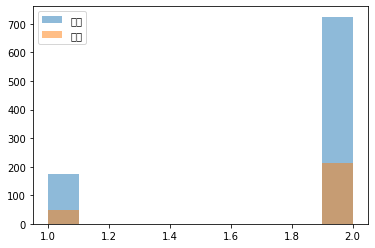

In [ ]:
new_hist(df_blood,'gender')

In [ ]:
new_crosstab(df_blood,'gender')

gender    1    2
risk            
0        50  212
1       173  725

gender      1      2
risk                
0       0.224  0.226
1       0.776  0.774


혈액검사 이산형 결과만(judge) 고려했을 경우, 또는 연속형인 자료만 고려했을 경우 모두 gender는 유의하지 않음

In [ ]:
count = np.array([50,212])
num = np.array([173+50,212+725])

stat, p_value = proportions_ztest(count,num)

print('z검정통계량:{0:0.3f}'.format(stat))
print('p-value:{0:0.3f}'.format(p_value))
print('pvalue가 {0:0.3f}로 0.05보다 크므로 유의하지 않다.'.format(p_value))

z검정통계량:-0.065
p-value:0.948
pvalue가 0.948로 0.05보다 크므로 유의하지 않다.


## 리스크 별 각 혈액검사 컬럼의 value 분포

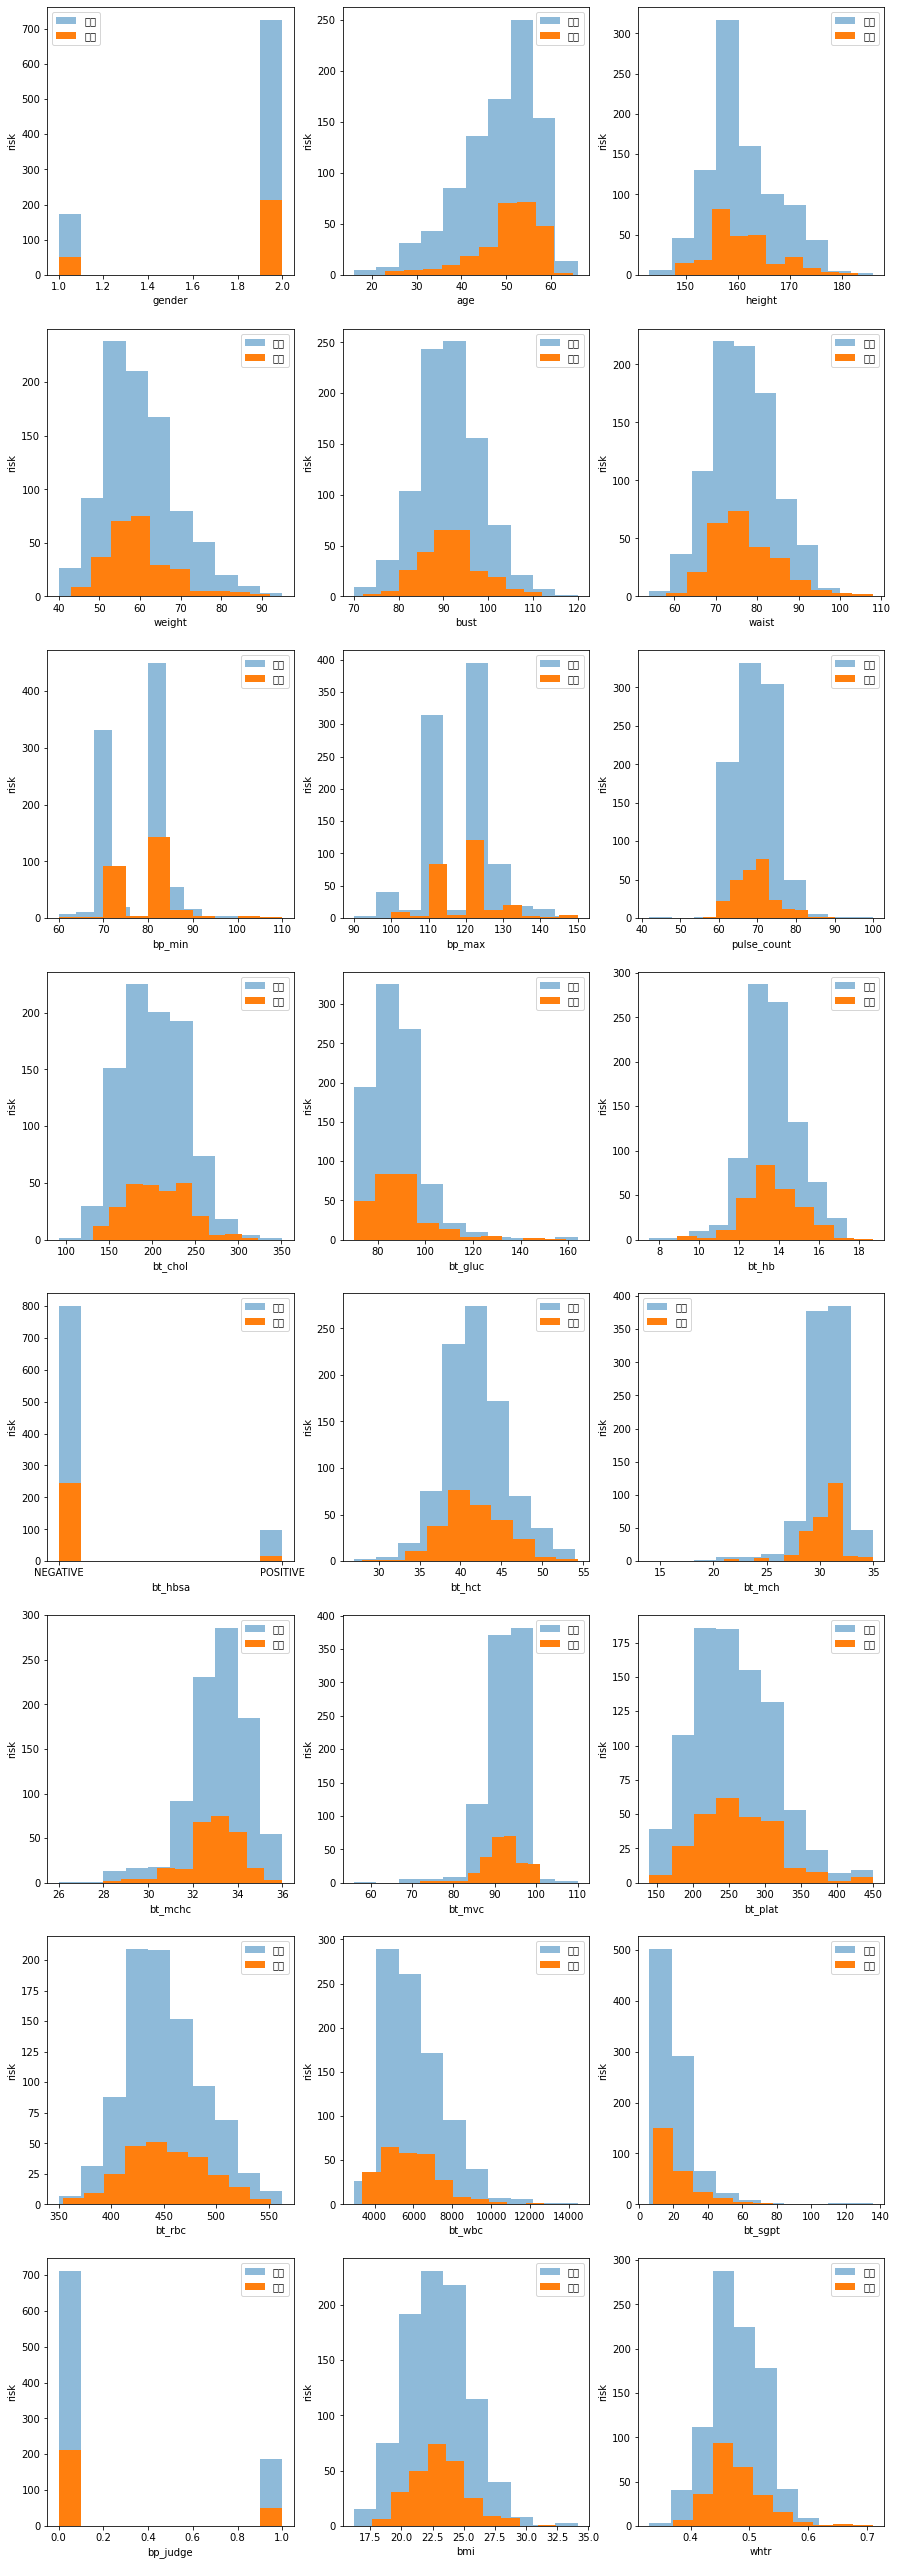

In [ ]:
i = 0
fig = plt.figure(figsize = (15, 70))
columns = df_blood.columns.drop('risk')
for col in columns:
    plt.subplot(df_blood.shape[1]//2, 3, i+1)
    i += 1   
    plt.hist(df_blood[df_blood["risk"] == 1][col], label = "위험", alpha = 0.5)
    plt.hist(df_blood[df_blood["risk"] == 0][col], label = "안정", alpha = 1.0)
   
    plt.xlabel(col)
    plt.ylabel("risk")
    plt.legend()
plt.show()

## 데이터 타입 변환 및 전처리

In [223]:
df_blood['gender'] = df_blood['gender'].astype('object')
df_blood['bp_judge'] = df_blood['bp_judge'].astype('object')
df_blood['bt_hbsa'] = df_blood['bt_hbsa'].astype('object')
df_blood.drop(['bp_min','bp_max'], axis = 1, inplace = True)
df_blood

,gender,age,height,weight,bust,waist,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,risk,bmi,whtr
4,1,62,165,70,96.0,82.0,64.0,142.0,1.2,84.0,17.4,NEGATIVE,50.5,31.0,34.0,90.0,181.0,561.0,8000.0,36.0,22.0,36.0,174.0,1,1,25.71,0.50
5,1,62,172,61,90.0,73.0,60.0,148.0,1.0,87.0,14.1,NEGATIVE,41.4,34.0,34.0,98.0,270.0,421.0,6800.0,32.0,28.0,19.0,65.0,0,1,20.62,0.42
11,1,61,170,71,100.0,84.0,76.0,202.0,1.0,85.0,14.8,NEGATIVE,42.3,31.0,35.0,88.0,240.0,479.0,5300.0,26.0,24.0,23.0,93.0,1,1,24.57,0.49
26,1,61,168,63,95.0,84.0,64.0,220.0,1.0,98.0,14.4,NEGATIVE,42.3,32.0,34.0,94.0,214.0,450.0,6500.0,89.0,25.0,43.0,101.0,0,1,22.32,0.50
43,1,60,160,60,87.0,72.0,72.0,170.0,0.7,82.0,14.0,NEGATIVE,39.6,34.0,35.0,97.0,244.0,409.0,8400.0,124.0,39.0,29.0,100.0,0,1,23.44,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,2,44,158,56,87.0,74.0,78.0,146.0,0.6,94.0,12.1,POSITIVE,36.5,32.0,34.0,95.0,217.0,374.0,7100.0,16.0,15.0,10.0,51.0,0,0,22.43,0.47
2058,2,24,166,68,91.0,84.0,80.0,198.0,0.7,91.0,13.2,POSITIVE,40.5,30.0,33.0,94.0,154.0,433.0,4100.0,15.0,24.0,18.0,53.0,0,1,24.68,0.51
2069,2,53,160,65,99.0,86.0,64.0,229.0,0.7,81.0,13.5,NEGATIVE,45.8,32.0,33.0,99.0,227.0,426.0,4700.0,27.0,25.0,25.0,103.0,0,1,25.39,0.54
2078,2,53,155,62,94.0,82.0,64.0,194.0,0.8,85.0,13.4,NEGATIVE,39.8,29.6,33.7,87.9,325.0,453.0,5410.0,17.0,22.0,22.0,248.0,1,0,25.81,0.53


In [224]:
df_blood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 4 to 2081
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       377 non-null    object 
 1   age          377 non-null    int64  
 2   height       377 non-null    int64  
 3   weight       377 non-null    int64  
 4   bust         377 non-null    float64
 5   waist        377 non-null    float64
 6   pulse_count  377 non-null    float64
 7   bt_chol      377 non-null    float64
 8   bt_crea      377 non-null    float64
 9   bt_gluc      377 non-null    float64
 10  bt_hb        377 non-null    float64
 11  bt_hbsa      377 non-null    object 
 12  bt_hct       377 non-null    float64
 13  bt_mch       377 non-null    float64
 14  bt_mchc      377 non-null    float64
 15  bt_mvc       377 non-null    float64
 16  bt_plat      377 non-null    float64
 17  bt_rbc       377 non-null    float64
 18  bt_wbc       377 non-null    float64
 19  bt_rgpt

In [225]:
df1_x = df_blood.drop(["risk"] , axis = 1)
df1_y = df_blood["risk"]
df1_x

,gender,age,height,weight,bust,waist,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,bmi,whtr
4,1,62,165,70,96.0,82.0,64.0,142.0,1.2,84.0,17.4,NEGATIVE,50.5,31.0,34.0,90.0,181.0,561.0,8000.0,36.0,22.0,36.0,174.0,1,25.71,0.50
5,1,62,172,61,90.0,73.0,60.0,148.0,1.0,87.0,14.1,NEGATIVE,41.4,34.0,34.0,98.0,270.0,421.0,6800.0,32.0,28.0,19.0,65.0,0,20.62,0.42
11,1,61,170,71,100.0,84.0,76.0,202.0,1.0,85.0,14.8,NEGATIVE,42.3,31.0,35.0,88.0,240.0,479.0,5300.0,26.0,24.0,23.0,93.0,1,24.57,0.49
26,1,61,168,63,95.0,84.0,64.0,220.0,1.0,98.0,14.4,NEGATIVE,42.3,32.0,34.0,94.0,214.0,450.0,6500.0,89.0,25.0,43.0,101.0,0,22.32,0.50
43,1,60,160,60,87.0,72.0,72.0,170.0,0.7,82.0,14.0,NEGATIVE,39.6,34.0,35.0,97.0,244.0,409.0,8400.0,124.0,39.0,29.0,100.0,0,23.44,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,2,44,158,56,87.0,74.0,78.0,146.0,0.6,94.0,12.1,POSITIVE,36.5,32.0,34.0,95.0,217.0,374.0,7100.0,16.0,15.0,10.0,51.0,0,22.43,0.47
2058,2,24,166,68,91.0,84.0,80.0,198.0,0.7,91.0,13.2,POSITIVE,40.5,30.0,33.0,94.0,154.0,433.0,4100.0,15.0,24.0,18.0,53.0,0,24.68,0.51
2069,2,53,160,65,99.0,86.0,64.0,229.0,0.7,81.0,13.5,NEGATIVE,45.8,32.0,33.0,99.0,227.0,426.0,4700.0,27.0,25.0,25.0,103.0,0,25.39,0.54
2078,2,53,155,62,94.0,82.0,64.0,194.0,0.8,85.0,13.4,NEGATIVE,39.8,29.6,33.7,87.9,325.0,453.0,5410.0,17.0,22.0,22.0,248.0,1,25.81,0.53


In [226]:
df_blood["bt_hbsa"] 
df_blood["bt_hbsa"] = np.where(df_blood["bt_hbsa"] == 'POSITIVE',1,0)
df_blood

,gender,age,height,weight,bust,waist,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,risk,bmi,whtr
4,1,62,165,70,96.0,82.0,64.0,142.0,1.2,84.0,17.4,0,50.5,31.0,34.0,90.0,181.0,561.0,8000.0,36.0,22.0,36.0,174.0,1,1,25.71,0.50
5,1,62,172,61,90.0,73.0,60.0,148.0,1.0,87.0,14.1,0,41.4,34.0,34.0,98.0,270.0,421.0,6800.0,32.0,28.0,19.0,65.0,0,1,20.62,0.42
11,1,61,170,71,100.0,84.0,76.0,202.0,1.0,85.0,14.8,0,42.3,31.0,35.0,88.0,240.0,479.0,5300.0,26.0,24.0,23.0,93.0,1,1,24.57,0.49
26,1,61,168,63,95.0,84.0,64.0,220.0,1.0,98.0,14.4,0,42.3,32.0,34.0,94.0,214.0,450.0,6500.0,89.0,25.0,43.0,101.0,0,1,22.32,0.50
43,1,60,160,60,87.0,72.0,72.0,170.0,0.7,82.0,14.0,0,39.6,34.0,35.0,97.0,244.0,409.0,8400.0,124.0,39.0,29.0,100.0,0,1,23.44,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,2,44,158,56,87.0,74.0,78.0,146.0,0.6,94.0,12.1,1,36.5,32.0,34.0,95.0,217.0,374.0,7100.0,16.0,15.0,10.0,51.0,0,0,22.43,0.47
2058,2,24,166,68,91.0,84.0,80.0,198.0,0.7,91.0,13.2,1,40.5,30.0,33.0,94.0,154.0,433.0,4100.0,15.0,24.0,18.0,53.0,0,1,24.68,0.51
2069,2,53,160,65,99.0,86.0,64.0,229.0,0.7,81.0,13.5,0,45.8,32.0,33.0,99.0,227.0,426.0,4700.0,27.0,25.0,25.0,103.0,0,1,25.39,0.54
2078,2,53,155,62,94.0,82.0,64.0,194.0,0.8,85.0,13.4,0,39.8,29.6,33.7,87.9,325.0,453.0,5410.0,17.0,22.0,22.0,248.0,1,0,25.81,0.53


## 로지스틱 회귀분석을 통한 vital few 선정

In [227]:
df_train, df_test = train_test_split(df_blood, test_size = 0.3 , random_state = 1234)
print(f'train data size : {df_train.shape}')
print(f'test data size : {df_test.shape}')

#from_formula 함수를 이용하여 변수 역할 지정
#분석 대상 이벤트 = 1
log_model = Logit.from_formula('''risk ~ C(gender) + age + height + bust +weight +bust+ bt_chol +pulse_count+bt_chol+bt_gluc +bt_hb+ C(bt_hbsa)+bt_hct+bt_mch+bt_mchc+ bt_mvc+bt_plat+ bt_rbc+bt_wbc+bt_sgpt+ pulse_count+ C(bp_judge)+ bmi + whtr''', df_blood)

#적합
log_result = log_model.fit()
#결과 출력
print(log_result.summary())

train data size : (263, 27)
test data size : (114, 27)
Optimization terminated successfully.
         Current function value: 0.525031
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                  377
Model:                          Logit   Df Residuals:                      355
Method:                           MLE   Df Model:                           21
Date:                Thu, 03 Dec 2020   Pseudo R-squ.:                 0.07923
Time:                        03:07:02   Log-Likelihood:                -197.94
converged:                       True   LL-Null:                       -214.97
Covariance Type:            nonrobust   LLR p-value:                   0.03568
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.8676     32.537   

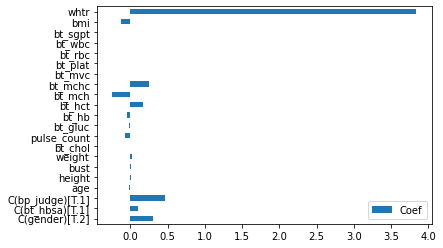

In [228]:
#설명변수 중요도
df_logistic_coef = pd.DataFrame({'Coef':log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = 'Coef')

In [229]:
df1_x = df_blood.drop(['risk'], axis = 1)

In [230]:
df1_x

,gender,age,height,weight,bust,waist,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,bmi,whtr
4,1,62,165,70,96.0,82.0,64.0,142.0,1.2,84.0,17.4,0,50.5,31.0,34.0,90.0,181.0,561.0,8000.0,36.0,22.0,36.0,174.0,1,25.71,0.50
5,1,62,172,61,90.0,73.0,60.0,148.0,1.0,87.0,14.1,0,41.4,34.0,34.0,98.0,270.0,421.0,6800.0,32.0,28.0,19.0,65.0,0,20.62,0.42
11,1,61,170,71,100.0,84.0,76.0,202.0,1.0,85.0,14.8,0,42.3,31.0,35.0,88.0,240.0,479.0,5300.0,26.0,24.0,23.0,93.0,1,24.57,0.49
26,1,61,168,63,95.0,84.0,64.0,220.0,1.0,98.0,14.4,0,42.3,32.0,34.0,94.0,214.0,450.0,6500.0,89.0,25.0,43.0,101.0,0,22.32,0.50
43,1,60,160,60,87.0,72.0,72.0,170.0,0.7,82.0,14.0,0,39.6,34.0,35.0,97.0,244.0,409.0,8400.0,124.0,39.0,29.0,100.0,0,23.44,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,2,44,158,56,87.0,74.0,78.0,146.0,0.6,94.0,12.1,1,36.5,32.0,34.0,95.0,217.0,374.0,7100.0,16.0,15.0,10.0,51.0,0,22.43,0.47
2058,2,24,166,68,91.0,84.0,80.0,198.0,0.7,91.0,13.2,1,40.5,30.0,33.0,94.0,154.0,433.0,4100.0,15.0,24.0,18.0,53.0,0,24.68,0.51
2069,2,53,160,65,99.0,86.0,64.0,229.0,0.7,81.0,13.5,0,45.8,32.0,33.0,99.0,227.0,426.0,4700.0,27.0,25.0,25.0,103.0,0,25.39,0.54
2078,2,53,155,62,94.0,82.0,64.0,194.0,0.8,85.0,13.4,0,39.8,29.6,33.7,87.9,325.0,453.0,5410.0,17.0,22.0,22.0,248.0,1,25.81,0.53


In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

#RFE 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
#목표 변수 분리
df1_y = df_blood['risk']

#sklearn의 선형회귀 모델
model = LinearRegression()

#전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df1_x, df1_y)

#선택된 변수
selected_cols = df1_x.columns[rfe.support_]

#제거된 변수
removed_cols = df1_x.columns[~rfe.support_]


print(f'Selected Vairables : {selected_cols}')
print(f'Removed Variables : {removed_cols}')

Selected Vairables : Index(['gender', 'bt_hbsa', 'bt_mchc', 'bp_judge', 'whtr'], dtype='object')
Removed Variables : Index(['age', 'height', 'weight', 'bust', 'waist', 'pulse_count', 'bt_chol',
       'bt_crea', 'bt_gluc', 'bt_hb', 'bt_hct', 'bt_mch', 'bt_mvc', 'bt_plat',
       'bt_rbc', 'bt_wbc', 'bt_rgpt', 'bt_sgot', 'bt_sgpt', 'bt_trig', 'bmi'],
      dtype='object')


## 모델링

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [164]:
df1_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 4 to 2081
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bt_chol   377 non-null    float64
 1   bt_hbsa   377 non-null    object 
 2   bt_gluc   377 non-null    float64
 3   bmi       377 non-null    float64
 4   bp_judge  377 non-null    object 
dtypes: float64(3), object(2)
memory usage: 17.7+ KB


In [165]:
df1_x = df_blood[['bt_chol', 'bt_hbsa', 'bt_gluc', 'bmi', 'bp_judge','whtr']]

In [191]:
df1_x = df_blood[['pulse_count','bt_crea','bt_hb','bt_rgpt','bt_sgot','bt_trig','bmi','bt_chol', 'bt_hbsa', 'bt_gluc', 'whtr', 'bp_judge']]

In [202]:
df1_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 4 to 2081
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pulse_count  377 non-null    float64
 1   bt_crea      377 non-null    float64
 2   bt_hb        377 non-null    float64
 3   bt_rgpt      377 non-null    float64
 4   bt_sgot      377 non-null    float64
 5   bt_trig      377 non-null    float64
 6   bmi          377 non-null    float64
 7   bt_chol      377 non-null    float64
 8   bt_hbsa      377 non-null    object 
 9   bt_gluc      377 non-null    float64
 10  whtr         377 non-null    float64
 11  bp_judge     377 non-null    object 
dtypes: float64(10), object(2)
memory usage: 38.3+ KB


In [232]:
df1_x['bt_hbsa'] = df1_x['bt_hbsa'].astype('object')
df1_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 4 to 2081
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       377 non-null    object 
 1   age          377 non-null    int64  
 2   height       377 non-null    int64  
 3   weight       377 non-null    int64  
 4   bust         377 non-null    float64
 5   waist        377 non-null    float64
 6   pulse_count  377 non-null    float64
 7   bt_chol      377 non-null    float64
 8   bt_crea      377 non-null    float64
 9   bt_gluc      377 non-null    float64
 10  bt_hb        377 non-null    float64
 11  bt_hbsa      377 non-null    object 
 12  bt_hct       377 non-null    float64
 13  bt_mch       377 non-null    float64
 14  bt_mchc      377 non-null    float64
 15  bt_mvc       377 non-null    float64
 16  bt_plat      377 non-null    float64
 17  bt_rbc       377 non-null    float64
 18  bt_wbc       377 non-null    float64
 19  bt_rgpt

In [233]:
df_raw_dummy = pd.get_dummies(df1_x)
df_raw_dummy.head()

,age,height,weight,bust,waist,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bmi,whtr,gender_1,gender_2,bt_hbsa_0,bt_hbsa_1,bp_judge_0,bp_judge_1
4,62,165,70,96.0,82.0,64.0,142.0,1.2,84.0,17.4,50.5,31.0,34.0,90.0,181.0,561.0,8000.0,36.0,22.0,36.0,174.0,25.71,0.50,1,0,1,0,0,1
5,62,172,61,90.0,73.0,60.0,148.0,1.0,87.0,14.1,41.4,34.0,34.0,98.0,270.0,421.0,6800.0,32.0,28.0,19.0,65.0,20.62,0.42,1,0,1,0,1,0
11,61,170,71,100.0,84.0,76.0,202.0,1.0,85.0,14.8,42.3,31.0,35.0,88.0,240.0,479.0,5300.0,26.0,24.0,23.0,93.0,24.57,0.49,1,0,1,0,0,1
26,61,168,63,95.0,84.0,64.0,220.0,1.0,98.0,14.4,42.3,32.0,34.0,94.0,214.0,450.0,6500.0,89.0,25.0,43.0,101.0,22.32,0.50,1,0,1,0,1,0
43,60,160,60,87.0,72.0,72.0,170.0,0.7,82.0,14.0,39.6,34.0,35.0,97.0,244.0,409.0,8400.0,124.0,39.0,29.0,100.0,23.44,0.45,1,0,1,0,1,0


In [234]:
df_raw_y = df_blood["risk"]

In [235]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, df_raw_y, test_size = 0.3, random_state= 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (263, 29)
train data Y size : (263,)
test data X size : (114, 29)
test data Y size : (114,)


In [236]:
tree_uncustomized =DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.570


In [237]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.605


In [238]:
from sklearn.ensemble import GradientBoostingClassifier

gb_final = GradientBoostingClassifier(random_state=1234)
gb_final.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Score on training set : {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
#test 데이터 설명력
print('Score on test set : {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : 0.614


In [239]:
#변수명 저장
v_feature_name = df_train_x.columns

#나무를 만들 때 사용되는 변수들의 중요도
#feature_importances_ : 설명변수의 중요도
#tree_final, feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_uncustomized.feature_importances_

#df_feature_importance 의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
17,bt_rgpt,0.104
15,bt_rbc,0.084
8,bt_gluc,0.080
1,height,0.078
21,bmi,0.063
16,bt_wbc,0.061
10,bt_hct,0.060
12,bt_mchc,0.052
11,bt_mch,0.047
0,age,0.047


Text(0, 0.5, 'Variable')

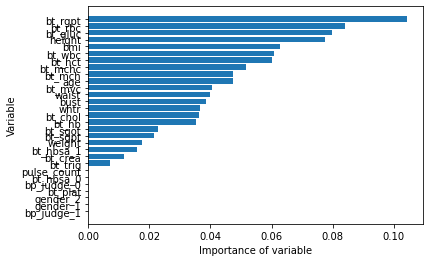

In [246]:
#설명변수 중요도 그래프, 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("Importance of variable")
plt.ylabel("Variable")

In [177]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
#모델 생성
tree_uncustomized = GBC(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))

#test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.954
Accuracy on test set : 0.605


## 거절 고객 최종 모델링을 통해 risk 값 도출

In [178]:
df_pre = pd.read_csv('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/insu_pre_review.csv', encoding = 'EUC-KR')
df_pre

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
0,C112346,혈액검사,재검,2014-10-09,1,70,165,63,92.0,88.0,80,130,72.0,140.0,NaN,81.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,23.0,20.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C112350,일반검진,재검,2014-11-18,1,69,178,75,99.0,92.0,80,130,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C112355,일반검진,재검,2015-03-18,1,70,169,69,96.0,88.0,80,120,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,80,120,72.0,167.0,0.9,87.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,28.0,32.0,73.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,85,130,76.0,205.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,40.0,53.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14933,C134246,혈액검사,승인,2015-02-11,2,63,150,53,94.0,80.0,80,120,74.0,238.0,NaN,86.0,13.8,NEGATIVE,42.5,29.0,32.0,89.0,310.0,476.0,10500.0,NaN,NaN,16.0,NaN,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14934,C134250,일반검진,승인,2015-09-16,2,52,164,60,90.0,66.0,80,120,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14935,C134251,일반검진,재검,2015-06-21,2,57,157,48,89.0,72.0,70,110,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14936,C134252,혈액검사,재검,2015-06-26,2,66,150,47,86.0,84.0,100,150,88.0,154.0,1.0,116.0,13.5,NEGATIVE,46.0,30.0,33.0,99.0,142.0,443.0,4000.0,NaN,NaN,36.0,88.0,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
reject = df_pre[df_pre['judge'] == '거절']

In [180]:
reject_1 = reject[reject['review_cat'] == '혈액검사']

In [181]:
reject_1['bmi'] = (reject_1['weight']/(reject_1['height']/100)**2).round(2)
reject_1['whtr'] = (reject_1['waist']/reject_1['height']).round(2)
reject_1

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,85,130,76.0,205.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,40.0,53.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.49,0.55
12,C112374,혈액검사,거절,2015-01-22,1,70,175,66,98.0,84.0,90,160,72.0,225.0,NaN,91.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,21.0,31.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.55,0.48
49,C112426,혈액검사,거절,2014-10-16,1,68,170,72,96.0,90.0,80,135,68.0,245.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,18.0,17.0,206.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.91,0.53
50,C112427,혈액검사,거절,2015-03-19,1,68,169,57,97.0,81.0,80,130,78.0,188.0,NaN,131.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,23.0,24.0,NaN,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.96,0.48
53,C112431,혈액검사,거절,2015-04-14,1,68,165,70,97.0,89.0,80,120,74.0,190.0,1.0,88.0,15.1,NEGATIVE,44.9,32.0,34.0,94.0,248.0,477.0,8400.0,147.0,82.0,123.0,135.0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,25.71,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14906,C134198,혈액검사,거절,2015-09-13,1,44,174,75,97.0,86.0,80,120,76.0,168.0,0.9,172.0,15.0,POSITIVE,44.1,29.0,34.0,85.0,234.0,522.0,7700.0,32.0,39.0,86.0,191.0,4,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,24.77,0.49
14908,C134201,혈액검사,거절,2015-02-16,1,48,160,58,91.0,74.0,80,130,68.0,226.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,21.0,21.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.66,0.46
14909,C134203,혈액검사,거절,2015-09-07,1,51,165,65,98.0,87.0,90,150,76.0,271.0,0.8,130.0,16.8,NEGATIVE,47.9,30.0,35.0,85.0,298.0,560.0,5600.0,208.0,37.0,31.0,376.0,4,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,23.88,0.53
14910,C134204,혈액검사,거절,2015-03-10,1,54,180,83,95.0,86.0,80,120,72.0,158.0,NaN,123.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,19.0,22.0,NaN,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.62,0.48


In [182]:
reject_1.isna().sum()

customer_id             0
review_cat              0
judge                   0
review_date             0
gender                  0
age                     0
height                  0
weight                  0
bust                    0
waist                   0
bp_min                  0
bp_max                  0
pulse_count             1
bt_chol                 0
bt_crea              1182
bt_gluc                 0
bt_hb                 825
bt_hbsa                 0
bt_hct                825
bt_mch                825
bt_mchc               825
bt_mvc                825
bt_plat               825
bt_rbc                825
bt_wbc                825
bt_rgpt               829
bt_sgot               800
bt_sgpt                 0
bt_trig               964
judge_score             0
bp_judge                0
pulse_count_judge       0
bt_chol_judge           0
bt_crea_judge           0
bt_gluc_judge           0
bt_hb_judge             0
bt_hbsa_judge           0
bt_hct_judge            0
bt_mch_judge

In [247]:
rf_final = RandomForestClassifier(random_state=1234, n_estimators=20, max_depth=5,min_samples_split=53)
rf_final.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on prediction: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.810
Score on prediction: 0.614


In [187]:
x = reject_1[['bt_chol', 'bt_hbsa', 'bt_gluc', 'bmi', 'bp_judge','whtr']]
x['bt_hbsa'] = x['bt_hbsa'].astype('object')
x['bp_judge'] = x['bp_judge'].astype('object')
x = pd.get_dummies(x)
x

,bt_chol,bt_gluc,bmi,whtr,bt_hbsa_NEGATIVE,bt_hbsa_POSITIVE,bp_judge_0,bp_judge_1
4,205.0,83.0,26.49,0.55,1,0,0,1
12,225.0,91.0,21.55,0.48,1,0,0,1
49,245.0,83.0,24.91,0.53,1,0,0,1
50,188.0,131.0,19.96,0.48,1,0,0,1
53,190.0,88.0,25.71,0.54,1,0,1,0
...,...,...,...,...,...,...,...,...
14906,168.0,172.0,24.77,0.49,0,1,1,0
14908,226.0,103.0,22.66,0.46,1,0,0,1
14909,271.0,130.0,23.88,0.53,1,0,0,1
14910,158.0,123.0,25.62,0.48,1,0,1,0


In [188]:
pred = rf_final.predict(x)
x['risk'] = pred
x['customer_id'] = reject_1['customer_id']

In [189]:
pred = gb_final.predict(x)
x['risk'] = pred
x['customer_id'] = reject_1['customer_id']

ValueError: ignored

In [190]:
x.groupby('risk').count()

,bt_chol,bt_gluc,bmi,whtr,bt_hbsa_NEGATIVE,bt_hbsa_POSITIVE,bp_judge_0,bp_judge_1,customer_id
risk,,,,,,,,,
0,127,127,127,127,127,127,127,127,127
1,2217,2217,2217,2217,2217,2217,2217,2217,2217


2344명의 거절 고객 중,  
 217명 수익, 2127명 위험고객으로 분류

## 거절 고객 중 수익고객과 위험고객 분리하여 csv로 저장

In [ ]:
df_profit = x[x['risk'] == 0][['customer_id','risk']]
df_risk = x[x['risk'] == 1][['customer_id','risk']]

df_profit =  pd.merge(reject_1, df_profit, on = 'customer_id')
df_risk = pd.merge(reject_1, df_risk, on = 'customer_id')

In [ ]:
df_profit

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,risk
0,C112510,혈액검사,거절,2014-12-19,1,66,172,71,101.0,85.0,80,120,64.0,164.0,NaN,116.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,38.0,34.0,63.0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.00,0.49,0
1,C112785,혈액검사,거절,2015-09-17,1,63,168,55,87.0,76.0,75,115,68.0,112.0,1.0,116.0,15.5,NEGATIVE,45.6,34.0,34.0,99.0,216.0,451.0,5900.0,17.0,23.0,17.0,84.0,2,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.49,0.45,0
2,C112793,혈액검사,거절,2015-08-31,1,63,158,57,89.0,81.0,70,120,72.0,180.0,0.9,148.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,22.0,27.0,164.0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.83,0.51,0
3,C112826,혈액검사,거절,2015-09-13,1,62,164,73,101.0,92.0,80,130,72.0,171.0,1.0,73.0,15.3,NEGATIVE,45.9,35.4,32.8,106.2,320.0,432.0,6580.0,40.0,36.0,53.0,103.0,3,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.14,0.56,0
4,C112850,혈액검사,거절,2015-09-01,1,62,173,64,94.0,82.0,70,110,72.0,130.0,0.9,106.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,16.0,20.0,83.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.38,0.47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,C133914,혈액검사,거절,2015-09-03,2,54,163,80,114.0,93.0,85,120,70.0,280.0,0.8,154.0,13.0,NEGATIVE,38.3,30.0,34.0,90.0,294.0,426.0,6400.0,48.0,29.0,57.0,210.0,4,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30.11,0.57,0
213,C134126,혈액검사,거절,2015-02-22,2,50,163,63,87.0,83.0,80,120,70.0,267.0,NaN,136.0,14.6,NEGATIVE,46.9,29.0,31.0,92.0,209.0,507.0,5800.0,NaN,NaN,31.0,314.0,3,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.71,0.51,0
214,C134142,혈액검사,거절,2015-09-02,2,37,153,52,86.0,79.0,70,120,64.0,258.0,0.8,83.0,14.3,NEGATIVE,42.9,32.2,31.6,96.6,235.0,444.0,9340.0,NaN,NaN,28.0,229.0,4,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.21,0.52,0
215,C134163,혈액검사,거절,2015-08-28,2,48,155,58,90.0,75.0,70,110,68.0,136.0,0.7,94.0,12.5,NEGATIVE,40.2,30.0,31.0,96.0,270.0,420.0,4900.0,15.0,18.0,12.0,53.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.14,0.48,0


In [ ]:
df_risk

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,risk
0,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,85,130,76.0,205.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,40.0,53.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.49,0.55,1
1,C112374,혈액검사,거절,2015-01-22,1,70,175,66,98.0,84.0,90,160,72.0,225.0,NaN,91.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,21.0,31.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.55,0.48,1
2,C112426,혈액검사,거절,2014-10-16,1,68,170,72,96.0,90.0,80,135,68.0,245.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,18.0,17.0,206.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.91,0.53,1
3,C112427,혈액검사,거절,2015-03-19,1,68,169,57,97.0,81.0,80,130,78.0,188.0,NaN,131.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,23.0,24.0,NaN,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.96,0.48,1
4,C112431,혈액검사,거절,2015-04-14,1,68,165,70,97.0,89.0,80,120,74.0,190.0,1.0,88.0,15.1,NEGATIVE,44.9,32.0,34.0,94.0,248.0,477.0,8400.0,147.0,82.0,123.0,135.0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,25.71,0.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,C134162,혈액검사,거절,2014-11-09,2,47,152,50,93.0,77.0,70,110,72.0,166.0,NaN,104.0,12.0,NEGATIVE,37.4,31.0,32.0,98.0,235.0,380.0,6400.0,NaN,NaN,20.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.64,0.51,1
2123,C134201,혈액검사,거절,2015-02-16,1,48,160,58,91.0,74.0,80,130,68.0,226.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,21.0,21.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.66,0.46,1
2124,C134203,혈액검사,거절,2015-09-07,1,51,165,65,98.0,87.0,90,150,76.0,271.0,0.8,130.0,16.8,NEGATIVE,47.9,30.0,35.0,85.0,298.0,560.0,5600.0,208.0,37.0,31.0,376.0,4,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,23.88,0.53,1
2125,C134204,혈액검사,거절,2015-03-10,1,54,180,83,95.0,86.0,80,120,72.0,158.0,NaN,123.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,19.0,22.0,NaN,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.62,0.48,1


In [ ]:
df_profit.to_csv('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/reject_profit.csv',encoding='euckr')
df_risk.to_csv('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/reject_risk.csv',encoding='euckr')

In [51]:
df_1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/insu_request.csv',encoding='euckr')

In [50]:
df_1.to_excel('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/insu_request.xlsx',encoding='euckr')

KeyboardInterrupt: ignored

In [52]:
df_1

,customer_id,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,req_id,req_id_seq,sick_main,sick_1st,sick_2nd,sick_3rd,dg_cat,dg_start_date,dg_end_date,dg_duration,insu_req_amount,insu_pay_amount,insu_pay_date,insu_duration,insu_cum_amount
0,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20101118-12660-01-001,1,S02,S02,NaN,NaN,외래,24-Oct-15,16-Nov-15,24,424498,724498.0,18-Nov-15,11,1320000
1,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,3,S92,S92,NaN,NaN,외래,17-Feb-16,17-Feb-16,1,34950,490079.0,13-Mar-16,15,1800000
2,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,4,S92,S92,NaN,NaN,외래,24-Feb-16,24-Feb-16,1,0,490079.0,13-Mar-16,15,1800000
3,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,8,S92,S92,NaN,NaN,외래,02-Mar-16,02-Mar-16,1,0,490079.0,13-Mar-16,15,1800000
4,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20110314-17403-01-001,9,S92,S92,NaN,NaN,외래,09-Mar-16,09-Mar-16,1,16000,490079.0,13-Mar-16,15,1800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49444,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,1,J45,J45,NaN,NaN,외래,25-Sep-17,25-Sep-17,1,19100,140900.0,06-Jun-18,33,1650000
49445,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,2,J45,J45,NaN,NaN,외래,25-Sep-17,25-Sep-17,1,42970,140900.0,06-Jun-18,33,1650000
49446,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,3,J45,J45,NaN,NaN,외래,20-Nov-17,20-Nov-17,1,31200,140900.0,06-Jun-18,33,1650000
49447,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20130607-14972-01-001,5,J45,J45,NaN,NaN,외래,13-Dec-17,13-Dec-17,1,33200,140900.0,06-Jun-18,33,1650000


In [59]:
a['review_cat'].value_counts()

혈액검사    3553
일반검진     993
Name: review_cat, dtype: int64

In [57]:
a = df_1.drop_duplicates( ["customer_id" ] )

In [58]:
a

,customer_id,review_cat,judge,gender,age,insu_id,insu_contract_date,insu_prod_id,insu_prod_name,req_id,req_id_seq,sick_main,sick_1st,sick_2nd,sick_3rd,dg_cat,dg_start_date,dg_end_date,dg_duration,insu_req_amount,insu_pay_amount,insu_pay_date,insu_duration,insu_cum_amount
0,C112379,혈액검사,재검,1,69,INS-10484,08-Dec-14,PR-20363,가족 만족 보험 1,C112379-20101118-12660-01-001,1,S02,S02,NaN,NaN,외래,24-Oct-15,16-Nov-15,24,424498,724498.0,18-Nov-15,11,1320000
10,C112404,혈액검사,재검,1,69,INS-10371,28-Mar-15,PR-20363,가족 만족 보험 1,C112404-20100831-12754-01-001,2,S33,S33,NaN,NaN,입원,13-Aug-15,13-Aug-15,1,307520,1008750.0,30-Aug-15,5,600000
12,C112411,일반검진,재검,1,69,INS-10266,19-Sep-15,PR-20363,가족 만족 보험 1,C112411-20101111-18755-01-001,1,S33,S335,NaN,NaN,입원,09-Nov-15,12-Nov-15,4,333680,553680.0,16-Nov-15,2,240000
13,C112570,일반검진,재검,1,67,INS-17614,26-May-15,PR-20418,통합보험 +1,C112570-20100730-10580-01-001,1,S83,S83,NaN,NaN,외래,27-Jun-15,25-Jul-15,29,412210,412210.0,01-Aug-15,3,375000
15,C112727,일반검진,승인,1,65,INS-17707,23-Jun-15,PR-20418,통합보험 +1,C112727-20120813-20372-01-001,1,S13,S13,NaN,NaN,외래,10-Aug-17,12-Aug-17,3,201880,201880.0,16-Aug-17,26,3250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49407,C134197,혈액검사,재검,1,42,INS-13759,22-Dec-14,PR-20069,건강보험,C134197-20120103-13776-01-001,1,K31,K31,NaN,NaN,외래,30-Dec-16,30-Dec-16,1,10000,63100.0,01-Jan-17,25,2500000
49417,C134221,혈액검사,재검,2,51,INS-14269,08-Sep-15,PR-20069,건강보험,C134221-20101012-11038-02-001,1,N39,N39,J00,K21,입원,15-Sep-15,08-Oct-15,24,623700,1103700.0,12-Oct-15,1,100000
49429,C134227,혈액검사,재검,2,45,INS-13466,24-Nov-14,PR-20069,건강보험,C134227-20100423-13218-01-001,1,J00,J00,NaN,NaN,외래,24-Jan-15,24-Jan-15,1,42600,42600.0,25-Apr-15,5,500000
49435,C134250,일반검진,승인,2,52,INS-18892,15-Sep-15,PR-20765,건강 보살핌,C134250-20110420-10774-02-001,1,K30,K30,NaN,NaN,외래,10-Jan-16,10-Jan-16,1,65200,65200.0,18-Apr-16,7,350000


In [28]:
a = a[['customer_id','insu_prod_name']]

In [25]:
b = pd.read_csv('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/기존위험고객군.csv',encoding='euckr')

In [29]:
a

,customer_id,insu_prod_name
0,C112379,가족 만족 보험 1
10,C112404,가족 만족 보험 1
12,C112411,가족 만족 보험 1
13,C112570,통합보험 +1
15,C112727,통합보험 +1
...,...,...
49407,C134197,건강보험
49417,C134221,건강보험
49429,C134227,건강보험
49435,C134250,건강 보살핌


In [36]:
a.to_excel('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/보험상품보자.xlsx',encoding='euckr')

In [26]:
b

,Unnamed: 0,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk,bmi,whtr,bt_chol_z_value,bt_crea_z_value,bt_gluc_z_value,bt_hb_z_value,bt_hct_z_value,bt_mch_z_value,bt_mchc_z_value,bt_mvc_z_value,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score
0,0,C112379,혈액검사,재검,2014-12-09,1,69,160,59,84.0,72.0,80,135,66.0,231.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,29.0,17.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,23.05,0.45,0.858012,0.000000,1.222843,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.890947,0.438696,-0.400226,0.000000,5,0.802054
1,8,C113024,혈액검사,재검,2015-01-20,1,61,167,70,100.0,80.0,70,120,60.0,220.0,NaN,97.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,34.0,64.0,NaN,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,25.10,0.48,0.549010,0.000000,0.713770,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.318623,0.900264,2.982571,0.000000,5,1.092848
2,9,C113031,혈액검사,재검,2015-02-18,1,61,165,54,88.0,76.0,70,110,74.0,222.0,NaN,102.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.0,33.0,39.0,NaN,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,19.83,0.46,0.605192,0.000000,1.137998,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.838536,0.807951,1.183211,0.000000,5,1.114577
3,11,C113037,혈액검사,승인,2014-11-03,1,60,172,78,102.0,96.0,80,120,74.0,218.0,NaN,108.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.0,31.0,37.0,NaN,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,26.37,0.56,0.492827,0.000000,1.647071,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.467466,0.623323,1.039262,0.000000,5,1.253990
4,27,C113252,혈액검사,승인,2014-10-22,1,59,180,85,106.0,102.0,70,110,76.0,207.0,NaN,107.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,45.0,43.0,NaN,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,26.23,0.57,0.183825,0.000000,1.562226,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.022047,1.915716,1.471108,0.000000,5,1.022166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1136,C128105,혈액검사,재검,2014-12-15,2,45,160,67,100.0,89.0,80,120,72.0,220.0,NaN,97.0,15.7,NEGATIVE,46.6,31.0,34.0,92.0,348.0,508.0,9200.0,53.0,26.0,33.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,26.17,0.56,0.549010,0.000000,0.713770,1.507458,1.251782,0.35594,0.947821,-0.114166,1.622381,1.528267,2.092099,0.266213,0.161754,0.751364,0.000000,13,0.894899
107,1184,C128531,혈액검사,재검,2015-06-23,2,44,164,92,101.0,92.0,80,125,NaN,232.0,0.7,106.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,55.0,68.0,209.0,4,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,34.21,0.56,0.886103,-0.782817,1.477380,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161391,2.838854,3.270468,0.768296,7,1.231382
108,1208,C128725,혈액검사,재검,2015-09-28,2,43,167,75,100.0,83.0,70,110,72.0,224.0,0.7,101.0,15.5,NEGATIVE,45.3,31.0,34.0,91.0,330.0,499.0,8000.0,48.0,91.0,136.0,124.0,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,26.89,0.50,0.661374,-0.782817,1.053152,1.357942,0.909688,0.35594,0.947821,-0.320625,1.299508,1.285738,1.301553,

In [45]:
d = pd.merge(a,df_blood, on = 'customer_id')

In [48]:
d

,customer_id,insu_prod_name,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk,bmi,whtr
0,C112379,가족 만족 보험 1,혈액검사,재검,2014-12-09,1,69,160,59,84.0,72.0,80,135,66.0,231.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,29.0,17.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,23.05,0.45
1,C112404,가족 만족 보험 1,혈액검사,재검,2015-03-29,1,69,175,79,101.0,92.0,80,120,70.0,264.0,NaN,74.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,25.0,20.0,156.0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,25.80,0.53
2,C112856,통합보험 +1,혈액검사,재검,2015-08-04,1,62,165,70,96.0,82.0,80,130,64.0,142.0,1.2,84.0,17.4,NEGATIVE,50.5,31.0,34.0,90.0,181.0,561.0,8000.0,36.0,22.0,36.0,174.0,2,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,25.71,0.50
3,C112878,가족 만족 보험 2,혈액검사,승인,2015-08-26,1,62,172,61,90.0,73.0,80,120,60.0,148.0,1.0,87.0,14.1,NEGATIVE,41.4,34.0,34.0,98.0,270.0,421.0,6800.0,32.0,28.0,19.0,65.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,20.62,0.42
4,C112881,통합보험 +1,혈액검사,재검,2015-02-17,1,62,165,72,98.0,88.0,70,120,66.0,182.0,NaN,78.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,21.0,14.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,26.45,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,C134165,조심조심 보험 4,혈액검사,재검,2015-01-15,2,48,162,67,101.0,82.0,80,120,68.0,192.0,NaN,89.0,10.0,POSITIVE,35.6,22.0,28.0,78.0,328.0,455.0,4000.0,NaN,14.0,18.0,NaN,6,0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,25.53,0.51
1603,C134172,건강보험,혈액검사,재검,2015-01-09,2,37,160,70,99.0,91.0,80,120,68.0,190.0,NaN,88.0,13.2,POSITIVE,39.4,32.0,34.0,97.0,189.0,406.0,4200.0,32.0,35.0,39.0,NaN,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,27.34,0.57
1604,C134184,울라트 보험,혈액검사,승인,2015-08-13,2,53,155,62,94.0,82.0,85,120,64.0,194.0,0.8,85.0,13.4,NEGATIVE,39.8,29.6,33.7,87.9,325.0,453.0,5410.0,17.0,22.0,22.0,248.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,25.81,0.53
1605,C134197,건강보험,혈액검사,재검,2014-12-23,1,42,178,70,95.0,86.0,75,115,76.0,152.0,NaN,92.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,15.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,22.09,0.48


In [47]:
d.drop('Unnamed: 0', axis = 1, inplace =True)

KeyError: ignored

In [37]:
c['risk'] = 1

In [38]:
c

,customer_id,insu_prod_name,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk,bmi,whtr,bt_chol_z_value,bt_crea_z_value,bt_gluc_z_value,bt_hb_z_value,bt_hct_z_value,bt_mch_z_value,bt_mchc_z_value,bt_mvc_z_value,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score
0,C112379,가족 만족 보험 1,혈액검사,재검,2014-12-09,1,69,160,59,84.0,72.0,80,135,66.0,231.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,29.0,17.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,23.05,0.45,0.858012,0.000000,1.222843,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.890947,0.438696,-0.400226,0.000000,5,0.802054
1,C113024,건강보험,혈액검사,재검,2015-01-20,1,61,167,70,100.0,80.0,70,120,60.0,220.0,NaN,97.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,34.0,64.0,NaN,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,25.10,0.48,0.549010,0.000000,0.713770,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.318623,0.900264,2.982571,0.000000,5,1.092848
2,C113031,All My Life 1,혈액검사,재검,2015-02-18,1,61,165,54,88.0,76.0,70,110,74.0,222.0,NaN,102.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.0,33.0,39.0,NaN,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,19.83,0.46,0.605192,0.000000,1.137998,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.838536,0.807951,1.183211,0.000000,5,1.114577
3,C113037,건강보험,혈액검사,승인,2014-11-03,1,60,172,78,102.0,96.0,80,120,74.0,218.0,NaN,108.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.0,31.0,37.0,NaN,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,26.37,0.56,0.492827,0.000000,1.647071,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.467466,0.623323,1.039262,0.000000,5,1.253990
4,C113252,조심조심 보험 4,혈액검사,승인,2014-10-22,1,59,180,85,106.0,102.0,70,110,76.0,207.0,NaN,107.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,45.0,43.0,NaN,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,26.23,0.57,0.183825,0.000000,1.562226,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.022047,1.915716,1.471108,0.000000,5,1.022166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,C128105,건강보험,혈액검사,재검,2014-12-15,2,45,160,67,100.0,89.0,80,120,72.0,220.0,NaN,97.0,15.7,NEGATIVE,46.6,31.0,34.0,92.0,348.0,508.0,9200.0,53.0,26.0,33.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,26.17,0.56,0.549010,0.000000,0.713770,1.507458,1.251782,0.35594,0.947821,-0.114166,1.622381,1.528267,2.092099,0.266213,0.161754,0.751364,0.000000,13,0.894899
107,C128531,평생 건강 보장 1,혈액검사,재검,2015-06-23,2,44,164,92,101.0,92.0,80,125,NaN,232.0,0.7,106.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,55.0,68.0,209.0,4,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,34.21,0.56,0.886103,-0.782817,1.477380,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161391,2.838854,3.270468,0.768296,7,1.231382
108,C128725,All My Life 1,혈액검사,재검,2015-09-28,2,43,167,75,100.0,83.0,70,110,72.0,224.0,0.7,101.0,15.5,NEGATIVE,45.3,31.0,34.0,91.0,330.0,499.0,8000.0,48.0,91.0,136.0,124.0,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,26.89,0.50,0.661374,-0.782817,1.053152,1.357942,0.909688,0.

In [35]:
c.to_csv('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/기존위험고객군_1.csv',encoding='euckr')
c.to_excel('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/기존위험고객군_1.xlsx',encoding='euckr')

In [49]:
d.to_excel('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/기존위험고객군_수익.xlsx',encoding='euckr')